In [351]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import random as rand
from sklearn import preprocessing 

In [352]:
np.random.seed(26)
df = pd.read_csv('Data.csv')
feature_names = df.columns
for i in range(len(feature_names)):
 print(str(i), "\t", str(feature_names[i]),"\t\t\t", str(type(df.iloc[0,i])))

0 	 FULL NAME 			 <class 'str'>
1 	 TEAM 			 <class 'str'>
2 	 WingSpan(cm) 			 <class 'numpy.float64'>
3 	 POS 			 <class 'str'>
4 	 AGE 			 <class 'numpy.float64'>
5 	 GP 			 <class 'numpy.int64'>
6 	 MPG 			 <class 'numpy.float64'>
7 	 MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor 			 <class 'numpy.float64'>
8 	 USG%Usage RateUsage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor 			 <class 'numpy.float64'>
9 	 TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions 			 <class 'numpy.float64'>
10 	 FTA 			 <class 'numpy.int64'>
11 	 FT 			 <class 'numpy.float64'>
12 	 FT% 			 <class 'numpy.float64'>
13 	 2PA 			 <class 'numpy.int64'>
14 	 2P 			 <class 'numpy.float64'>
15 	 2P% 			 <class 'numpy.float64'>
16 	 3PA 			 <class 'numpy.int64'>
17 	 3P 			 <class 'numpy.float64'>
18 	 3P% 			 <class 'numpy.float64'>
19 	 eFG 		

In [353]:
df.columns

Index(['FULL NAME', 'TEAM', 'WingSpan(cm)', 'POS', 'AGE', 'GP', 'MPG',
       'MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor',
       'USG%Usage RateUsage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor',
       'TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions',
       'FTA', 'FT', 'FT%', '2PA', '2P', '2P%', '3PA', '3P', '3P%', 'eFG',
       'eFG%Effective Shooting PercentageWith eFG%, three-point shots made are worth 50% more than two-point shots made. eFG% Formula=(FGM+ (0.5 x 3PM))/FGA',
       'TS',
       'TS%True Shooting PercentageTrue shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.',
       'PPGPointsPoints per game.', 'RPGReboundsRebounds per game.',
       'TRB%Total Rebound PercentageTotal rebound percentage is estimated per

In [354]:
columns_to_norm = ['GP', 'MPG','WingSpan(cm)',
       'MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor',
       'USG%Usage RateUsage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor',
       'TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions',
       'FTA', 'FT', '2PA', '2P', '3PA', '3P', 'eFG',
       'TS',
       'PPGPointsPoints per game.', 'RPGReboundsRebounds per game.',
       'TRB%Total Rebound PercentageTotal rebound percentage is estimated percentage of available rebounds grabbed by the player while the player is on the court.',
       'APGAssistsAssists per game.',
       'AST%Assist PercentageAssist percentage is an estimated percentage of teammate field goals a player assisted while the player is on the court',
       'SPGStealsSteals per game.', 'BPGBlocksBlocks per game.',
       'TOPGTurnoversTurnovers per game.',
       'VIVersatility IndexVersatility index is a metric that measures a player’s ability to produce in points, assists, and rebounds. The average player will score around a five on the index, while top players score above 10',
       'ORTGOffensive RatingIndividual offensive rating is the number of points produced by a player per 100 total individual possessions.',
       'DRTGDefensive RatingIndividual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court.']

In [355]:
scaler = preprocessing.StandardScaler().fit(df[columns_to_norm])

In [356]:
N_Data = scaler.transform(df[columns_to_norm])

In [357]:
print(N_Data)

[[ 1.11023283 -0.79404917  0.38556988 ... -0.09148178 -0.1434137
  -1.22425089]
 [-1.36947054 -1.80953461 -0.79205677 ... -0.7672056          nan
          nan]
 [ 0.97247153  0.87348482  1.0915526  ...  0.16191465  0.66609642
   0.26410195]
 ...
 [ 1.20207369  1.51484404 -1.45132005 ...  1.97792243  0.49038879
   1.01746574]
 [ 0.5132672   0.14661103  0.05556745 ...  1.00656943  0.79787713
  -0.89350582]
 [ 1.61535759  0.29626152  0.99737213 ...  0.41531109  1.5948367
  -0.98537945]]


In [358]:
N_Data.astype

<function ndarray.astype>

In [359]:
df1 = pd.DataFrame(N_Data, columns = ['GP', 'MPG','WingSpan(cm)',
       'MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor',
       'USG%Usage RateUsage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor',
       'TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions',
       'FTA', 'FT', '2PA', '2P', '3PA', '3P', 'eFG',
       'TS',
       'PPGPointsPoints per game.', 'RPGReboundsRebounds per game.',
       'TRB%Total Rebound PercentageTotal rebound percentage is estimated percentage of available rebounds grabbed by the player while the player is on the court.',
       'APGAssistsAssists per game.',
       'AST%Assist PercentageAssist percentage is an estimated percentage of teammate field goals a player assisted while the player is on the court',
       'SPGStealsSteals per game.', 'BPGBlocksBlocks per game.',
       'TOPGTurnoversTurnovers per game.',
       'VIVersatility IndexVersatility index is a metric that measures a player’s ability to produce in points, assists, and rebounds. The average player will score around a five on the index, while top players score above 10',
       'ORTGOffensive RatingIndividual offensive rating is the number of points produced by a player per 100 total individual possessions.',
       'DRTGDefensive RatingIndividual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court.'])

In [360]:
df1

,GP,MPG,WingSpan(cm),MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor,"USG%Usage RateUsage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor",TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions,FTA,FT,2PA,2P,...,RPGReboundsRebounds per game.,TRB%Total Rebound PercentageTotal rebound percentage is estimated percentage of available rebounds grabbed by the player while the player is on the court.,APGAssistsAssists per game.,AST%Assist PercentageAssist percentage is an estimated percentage of teammate field goals a player assisted while the player is on the court,SPGStealsSteals per game.,BPGBlocksBlocks per game.,TOPGTurnoversTurnovers per game.,"VIVersatility IndexVersatility index is a metric that measures a player’s ability to produce in points, assists, and rebounds. The average player will score around a five on the index, while top players score above 10",ORTGOffensive RatingIndividual offensive rating is the number of points produced by a player per 100 total individual possessions.,DRTGDefensive RatingIndividual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court.
0,1.110233,-0.794049,0.385570,-0.794111,0.177939,0.097521,0.367783,-0.971993,0.201261,0.309256,...,-0.079320,1.247179,-0.785610,-0.795403,-0.704811,0.112953,-0.455204,-0.091482,-0.143414,-1.224251
1,-1.369471,-1.809535,-0.792057,-1.810021,-0.000171,-1.702996,-0.797949,-3.345231,-0.871794,-2.340610,...,-1.327953,-0.299698,-0.894030,-0.047115,-1.530910,-0.997524,-1.295328,-0.767206,NaN,NaN
2,0.972472,0.873485,1.091553,0.868287,-1.211317,0.657682,0.632722,-1.275058,0.579986,0.826644,...,2.209843,1.518928,-0.026672,-0.450039,0.797186,0.595769,0.336912,0.161915,0.666096,0.264102
3,1.247994,1.493465,0.762292,1.489121,0.926000,0.297579,2.953588,0.380147,2.944590,0.498032,...,2.251464,1.079949,1.870674,1.599118,1.397985,1.488979,1.873139,1.977922,0.791602,-0.250390
4,-0.726584,0.681077,1.139014,0.683576,0.747890,-0.769394,-0.405839,0.561986,-0.060934,0.050562,...,0.378513,-0.195180,-0.135092,-0.323406,-0.579645,1.078585,-0.155160,0.161915,-0.112037,0.668346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,-0.451062,0.670388,-0.603696,0.668184,-0.249524,-0.009176,-0.416437,0.538674,-0.211452,-0.012364,...,0.128786,-0.362410,0.894896,0.678149,2.374283,-0.104315,0.264902,0.499777,0.364883,1.660581
622,1.431676,0.510048,0.149748,0.509127,0.676646,0.430950,0.399576,-0.417149,2.099741,0.539983,...,1.086072,0.829104,1.274365,1.622143,1.197719,0.426783,1.105025,1.851224,0.389984,-0.342264
623,1.202074,1.514844,-1.451320,1.519906,2.582421,0.457625,4.988320,0.785789,2.570720,-0.075290,...,0.128786,-0.801388,4.039070,3.740373,0.571887,-0.587131,3.673404,1.977922,0.490389,1.017466
624,0.513267,0.146611,0.055567,0.149967,-0.035793,-0.115873,0.463161,-0.016170,0.536287,0.672825,...,1.335799,1.581639,-0.080882,0.021958,-0.129045,-0.152596,-0.023141,1.006569,0.797877,-0.893506


In [361]:
df1['Name']=df['FULL NAME']

In [362]:
df1['POS']=df['POS']

In [363]:
df1

,GP,MPG,WingSpan(cm),MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor,"USG%Usage RateUsage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor",TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions,FTA,FT,2PA,2P,...,APGAssistsAssists per game.,AST%Assist PercentageAssist percentage is an estimated percentage of teammate field goals a player assisted while the player is on the court,SPGStealsSteals per game.,BPGBlocksBlocks per game.,TOPGTurnoversTurnovers per game.,"VIVersatility IndexVersatility index is a metric that measures a player’s ability to produce in points, assists, and rebounds. The average player will score around a five on the index, while top players score above 10",ORTGOffensive RatingIndividual offensive rating is the number of points produced by a player per 100 total individual possessions.,DRTGDefensive RatingIndividual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court.,Name,POS
0,1.110233,-0.794049,0.385570,-0.794111,0.177939,0.097521,0.367783,-0.971993,0.201261,0.309256,...,-0.785610,-0.795403,-0.704811,0.112953,-0.455204,-0.091482,-0.143414,-1.224251,Precious Achiuwa,F
1,-1.369471,-1.809535,-0.792057,-1.810021,-0.000171,-1.702996,-0.797949,-3.345231,-0.871794,-2.340610,...,-0.894030,-0.047115,-1.530910,-0.997524,-1.295328,-0.767206,NaN,NaN,Jaylen Adams,G
2,0.972472,0.873485,1.091553,0.868287,-1.211317,0.657682,0.632722,-1.275058,0.579986,0.826644,...,-0.026672,-0.450039,0.797186,0.595769,0.336912,0.161915,0.666096,0.264102,Steven Adams,C
3,1.247994,1.493465,0.762292,1.489121,0.926000,0.297579,2.953588,0.380147,2.944590,0.498032,...,1.870674,1.599118,1.397985,1.488979,1.873139,1.977922,0.791602,-0.250390,Bam Adebayo,C-F
4,-0.726584,0.681077,1.139014,0.683576,0.747890,-0.769394,-0.405839,0.561986,-0.060934,0.050562,...,-0.135092,-0.323406,-0.579645,1.078585,-0.155160,0.161915,-0.112037,0.668346,LaMarcus Aldridge,C-F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,-0.451062,0.670388,-0.603696,0.668184,-0.249524,-0.009176,-0.416437,0.538674,-0.211452,-0.012364,...,0.894896,0.678149,2.374283,-0.104315,0.264902,0.499777,0.364883,1.660581,Delon Wright,G
622,1.431676,0.510048,0.149748,0.509127,0.676646,0.430950,0.399576,-0.417149,2.099741,0.539983,...,1.274365,1.622143,1.197719,0.426783,1.105025,1.851224,0.389984,-0.342264,Thaddeus Young,F
623,1.202074,1.514844,-1.451320,1.519906,2.582421,0.457625,4.988320,0.785789,2.570720,-0.075290,...,4.039070,3.740373,0.571887,-0.587131,3.673404,1.977922,0.490389,1.017466,Trae Young,G
624,0.513267,0.146611,0.055567,0.149967,-0.035793,-0.115873,0.463161,-0.016170,0.536287,0.672825,...,-0.080882,0.021958,-0.129045,-0.152596,-0.023141,1.006569,0.797877,-0.893506,Cody Zeller,F-C


In [364]:
df1 = df1.dropna()
df1 = df1[~df['3P'].isna()] 
df1 = df1.sample(frac = 1) 
train_proportion = 0.6
n = len(df1)
print('Size of dataset: ', str(n))

t = int(train_proportion * n)
target = df1['3P']
target_columns = ['3PA','3P']
data = df1.loc[:, ~df1.columns.isin(target_columns)]
# the following variable records the features of examples in the training set
train_x = data.iloc[:t]
# the following variable records the features of examples in the test set
test_x = data.iloc[t:]
# the following variable records the labels of examples in the training set
train_y = target[:t]
# the following variable records the labels of examples in the test set
test_y = target[t:]

print('Training dataset: ', train_x)

Size of dataset:  595
Training dataset:             GP       MPG  WingSpan(cm)  \
388  0.099983 -1.381962      0.432289   
88   0.651028  0.488669     -0.226974   
492 -1.599073 -0.248894      0.432289   
63   0.145904 -0.933010      0.243928   
313  0.329585  0.210747     -0.980418   
..        ...       ...           ...   
11  -0.910266  0.221436      0.856472   
182  1.523517 -0.024418     -1.074598   
565  0.742869  0.146611      0.243928   
387 -0.956187 -0.794049     -1.074598   
567  0.605108  1.525533      0.997372   

     MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor  \
388                                          -1.379029                                             
88                                            0.488604                                             
492                                          -0.255371                                             
63                                           -0.932644            

<ipython-input-364-3e0f901cff74>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[~df['3P'].isna()]


In [365]:
def string_to_float(string):
     try:
        return float(string)
     except:
        return 0.0
    
labels_real = [
 'GP',   
 'MPG',
 'WingSpan(cm)', 
 'FT',
 'VIVersatility IndexVersatility index is a metric that measures a player’s ability to produce in points, assists, and rebounds. The average player will score around a five on the index, while top players score above 10',
 'PPGPointsPoints per game.',
 'ORTGOffensive RatingIndividual offensive rating is the number of points produced by a player per 100 total individual possessions.',
 '2P',
 'RPGReboundsRebounds per game.',
 'TOPGTurnoversTurnovers per game.',
 'BPGBlocksBlocks per game.',
 'SPGStealsSteals per game.'
]

#labels_string = [
    #'POS',
    
#]



In [366]:
train_vals_real = np.asarray(train_x[labels_real])

test_vals_real = np.asarray(test_x[labels_real])

In [367]:
#assert(train_vals_from_string.applymap(lambda x:type(x)!=str).all(skipna=False).all(skipna=False) == True)
#assert(test_vals_from_string.applymap(lambda x:type(x)!=str).all(skipna=False).all(skipna=False) == True)

In [368]:
#train_vals_from_string = np.asarray(train_vals_from_string)
#test_vals_from_string = np.asarray(test_vals_from_string)

In [369]:
train_vals = np.concatenate((train_vals_real,np.ones((len(train_vals_real[:,0]),1))), axis = 1)

test_vals = np.concatenate((test_vals_real,np.ones((len(test_vals_real[:,0]),1))), axis = 1)


In [370]:
def MSE(y, pred):
    return np.mean(np.power(np.subtract(y,pred),2)) 

# This function plots the main diagonal;for a "predicted vs true" plot with perfect predictions, all data lies on this line
def plotDiagonal(xmin, xmax):
    xsamples = np.arange(xmin,xmax,step=0.01)
    plt.plot(xsamples,xsamples,c='black')

# This helper function plots x vs y and labels the axes
def plotdata(x=None,y=None,xname=None,yname=None,margin=0.05,plotDiag=True,zeromin=False):
    plt.scatter(x,y,label='data')
    plt.xlabel(xname)
    plt.ylabel(yname)
    range_x = max(x) - min(x)
    range_y = max(y) - min(y)
    if plotDiag:
        plotDiagonal(min(x)-margin*range_x,max(x)+margin*range_x)
    if zeromin:
        plt.xlim(0.0,max(x)+margin*range_x)
        plt.ylim(0.0,max(y)+margin*range_y)
    else:
        plt.xlim(min(x)-margin*range_x,max(x)+margin*range_x)
        plt.ylim(min(y)-margin*range_y,max(y)+margin*range_y)
    plt.show()

# This function plots the predicted labels vs the actual labels (We only plot the first 1000 points to avoid slow plots)
def plot_pred_true(test_pred=None, test_y=None, max_points = 1000):
    plotdata(test_pred[1:max_points], test_y[1:max_points],'Predicted', 'True', zeromin=True)

In [371]:
# This function runs OLS and bypasses any SVD (Singular Value Decomposition) convergence errors by refitting the model
def run_OLS(train_y, test_y, train_vals, test_vals):
    ols_model = sm.regression.linear_model.OLS(train_y, train_vals)
    while True: # Bypasses SVD convergence assertion error
        try:
            results = ols_model.fit()
            break
        except:
            None
            
    w = np.array(results.params).reshape([len(results.params),1])

    train_pred = np.matmul(train_vals,w)
    test_pred = np.matmul(test_vals,w)

    train_MSE = MSE(train_y, train_pred.flatten())
    test_MSE = MSE(test_y, test_pred.flatten())
    
    return train_MSE, test_MSE, test_pred,w

In [372]:
train_MSE, test_MSE, test_pred,w = run_OLS(train_y, test_y, train_vals, test_vals)

Train MSE	 0.5628999059958059
Test MSE	 0.6673015209477893


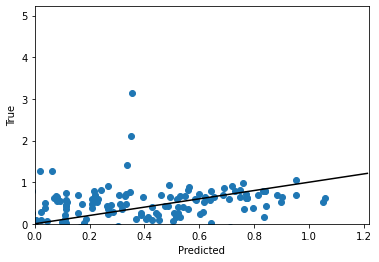

In [373]:
print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y) #.flatten() will make sure the dimensions match

In [374]:
cat_labels = [
  'POS'
]

#Sets of all categories in a particular column
cats_sets = [train_x.loc[:, label].fillna('NaN').unique() for label in cat_labels]

In [375]:
def onehot(column=None, col=None):
    column = column.astype(pd.CategoricalDtype(categories = col))
    hot_encode = pd.get_dummies(column)
    
    return np.asarray(hot_encode)

In [376]:
trv = np.zeros((len(train_x),1))
for i in range(len(cat_labels)):
    trv = np.concatenate((trv,onehot(train_x[cat_labels[i]],cats_sets[i])),axis = 1)
     
train_cat_vals = trv[:,1:]

tv = np.zeros((len(test_x),1))
for i in range(len(cat_labels)):
    tv = np.concatenate((tv,onehot(test_x[cat_labels[i]],cats_sets[i])),axis = 1)
    
test_cat_vals = tv[:,1:]

In [377]:
train_cat_vals.shape

(357, 7)

In [378]:
train_vals1 = np.concatenate((train_vals,train_cat_vals),axis = 1)
test_vals1 = np.concatenate((test_vals,test_cat_vals),axis = 1)

In [379]:
train_vals1.shape

(357, 20)

In [380]:
train_ridge = np.concatenate((train_vals_real,train_cat_vals),axis = 1)

In [381]:
test_ridge = np.concatenate((test_vals_real,test_cat_vals),axis = 1)

In [382]:
train_MSE, test_MSE, test_pred,w = run_OLS(train_y, test_y, train_vals1, test_vals1)

Train MSE	 0.5549454499930894
Test MSE	 0.6658533409049001


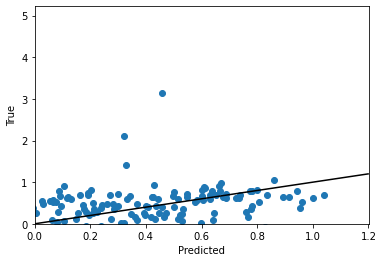

In [383]:
print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y)

In [384]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
alpha = .1 # regularization parameter

lin = Ridge(alpha=alpha).fit(train_ridge,train_y)
yhat = lin.predict(test_ridge)
yhat

array([ 1.79114601e-01, -1.69545992e-01, -9.50912518e-01, -1.63035016e-01,
       -5.78084190e-01, -1.01001020e-01, -2.28678546e-01,  4.66456399e-01,
       -4.60393642e-01,  5.23039476e-01,  3.16322551e-01, -1.35084231e-01,
        2.36791496e-01, -2.16064232e-01, -7.87257053e-01,  6.58723074e-02,
       -3.42169644e-01,  6.00594087e-01,  8.79044050e-02,  6.29000192e-01,
        4.05363924e-01,  6.39761063e-01,  3.01213435e-01,  4.36054760e-01,
       -1.83313518e-01,  1.82282537e-01, -9.79295375e-02, -2.16653773e-01,
        3.95618760e-01,  9.99352509e-01, -1.50231425e-01, -9.40610086e-01,
        5.29234230e-01, -1.24800141e-01,  4.50246669e-03,  5.17590058e-01,
        1.28082272e-01,  6.64843135e-01,  5.99295234e-01,  5.13336678e-01,
        3.29993209e-01, -2.15907039e-01,  3.44583215e-01,  1.05803637e-01,
        2.42728045e-01,  3.21634234e-01,  6.88008828e-01,  6.05281245e-01,
        3.91784816e-01,  1.83289483e-01, -1.12389391e+00,  6.31313778e-01,
        1.94091089e-01, -

In [385]:
yhat.shape

(238,)

In [386]:
train_ridge.shape

(357, 19)

In [387]:
Ridge_MSE = MSE(test_y, yhat)
print(Ridge_MSE)

0.6657442516163883


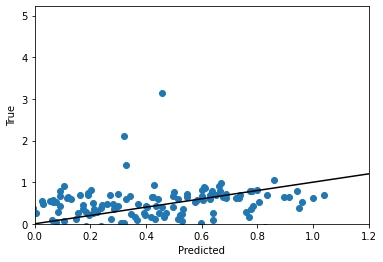

In [388]:
plot_pred_true(yhat,test_y)